<a href="https://colab.research.google.com/github/YannisZang/CS_5864/blob/main/HW1/Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: Projective transformation matrix (10 points)          

In this part, you will explore various image transformations using projective transform matrices. To accomplish these tasks, we will utilize the ProjectiveTransformLinks to an external site. and warpLinks to an external site. functions provided by the skimage library.

1.   Begin by selecting an image of your choice for this assignment. Ensure that the image contains recognizable features, as you will be applying various transformations to it.

Text(0.5, 1.0, 'Selected Image')

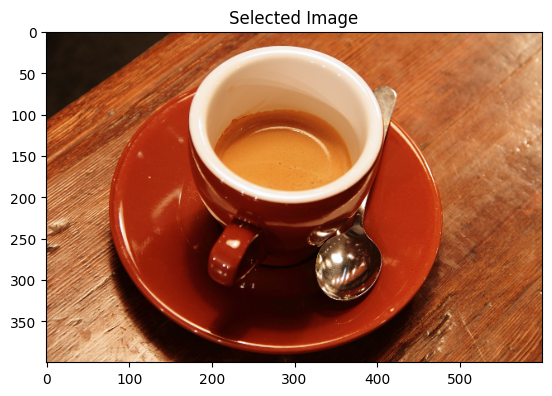

In [ ]:
import numpy as np
from skimage import data
from skimage.transform import ProjectiveTransform, warp
import matplotlib.pyplot as plt

# select a image from buil in data

img = data.coffee()
rows, cols = img.shape[:2]

plt.imshow(img)
plt.title("Selected Image")



2.   Scaling, shear, and translation:

*   Perform scaling, shear, and translation operations on the chosen image separately. You can choose the values of the matrix as you see fit, however, choose them so that the effect of each element of the matrix is visible. Do not simply use the sample operations from the API text.
*   For each operation, show the matrix you used and the warped image. Explain in a sentence what the impact of the various parameters in the projective matrix are.

Text(0.5, 1.0, 'Scale at x and y')

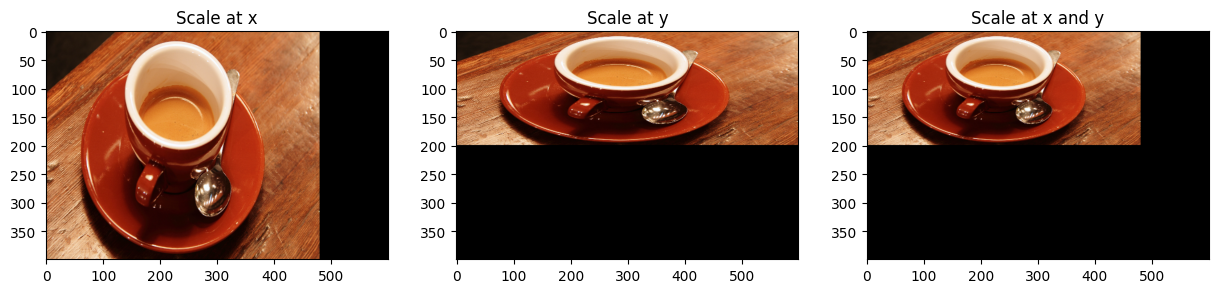

In [ ]:
def display(img, title: str):
  plt.imshow(img)
  # plt.axis("off")
  plt.title(title)
  plt.show()

sx, sy = 0.8, 0.5


# parameter sx scale the image at x axis by 0.8 times
matrix_x = np.array([
    [sx, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

matrix_x = ProjectiveTransform(np.linalg.inv(matrix_x))


img_scaling_x = warp(img, matrix_x) # output_shape=(2*rows, 2*cols)

# parameter sy scale the image at y axis by 0.5 times
matrix_y = np.array([
    [1, 0, 0],
    [0, sy, 0],
    [0, 0, 1]
])

matrix_y = ProjectiveTransform(np.linalg.inv(matrix_y))

img_scaling_y = warp(img, matrix_y) # output_shape=(2*rows, 2*cols)

# scale x and y
matrix_xy = np.array([
    [sx, 0, 0],
    [0, sy, 0],
    [0, 0, 1]
])

matrix_xy = ProjectiveTransform(np.linalg.inv(matrix_xy))

img_scaling_xy = warp(img, matrix_xy) # output_shape=(2*rows, 2*cols)

fig, ax = plt.subplots(1, 3, figsize=(15,5))

ax[0].imshow(img_scaling_x)
ax[0].set_title("Scale at x")

ax[1].imshow(img_scaling_y)
ax[1].set_title("Scale at y")

ax[2].imshow(img_scaling_xy)
ax[2].set_title("Scale at x and y")



Text(0.5, 1.0, 'Shear at y')

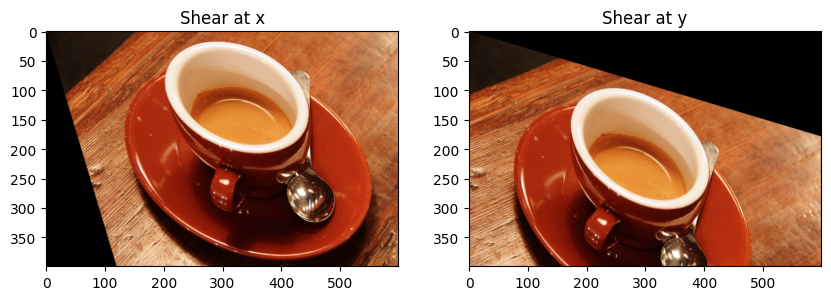

In [ ]:
# shear
k = 0.3

# The matrix shears the image at x axis by k * y
matrix_shear_x = np.array([
  [1, k, 0],
  [0, 1, 0],
  [0, 0, 1]
])

matrix_shear_x = ProjectiveTransform(np.linalg.inv(matrix_shear_x))

img_shear_x = warp(img, matrix_shear_x)

# The matrix shears the image at y axis by k * x
matrix_shear_y = np.array([
  [1, 0, 0],
  [k, 1, 0],
  [0, 0, 1]
])

matrix_shear_y = ProjectiveTransform(np.linalg.inv(matrix_shear_y))

img_shear_y = warp(img, matrix_shear_y)


fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(img_shear_x)
ax[0].set_title("Shear at x")


ax[1].imshow(img_shear_y)
ax[1].set_title("Shear at y")



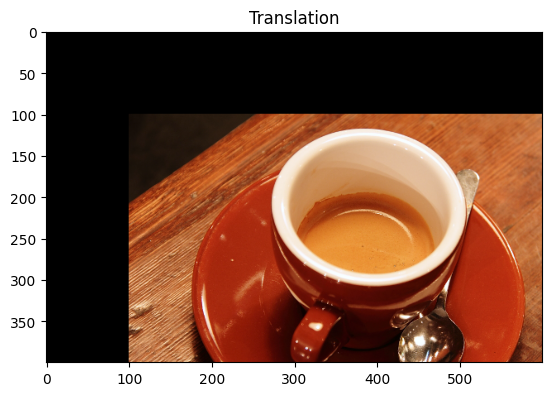

In [ ]:
# translation
t = 100

# The matrix translates the image at y axis and x axis by 100 pixels
matrix_translation = np.array([
  [1, 0, t],
  [0, 1, t],
  [0, 0, 1]
])

matrix_translation = ProjectiveTransform(np.linalg.inv(matrix_translation))

# img_translation = warp(img, matrix_translation, mode='wrap')
img_translation = warp(img, matrix_translation, mode='constant')


display(img_translation, "Translation")





3.   Rotation


*   Write code to rotate the original image by any specified number of degrees (e.g., 30 degrees, 45 degrees, etc.). For demonstration purposes, you can pick any rotation angle that provides meaningful visual changes.
*   Create several rotated versions of the image, each with a different rotation angle, which use your code. Show the matrices and the rotated images.





Text(0.5, 1.0, 'Rotation -30')

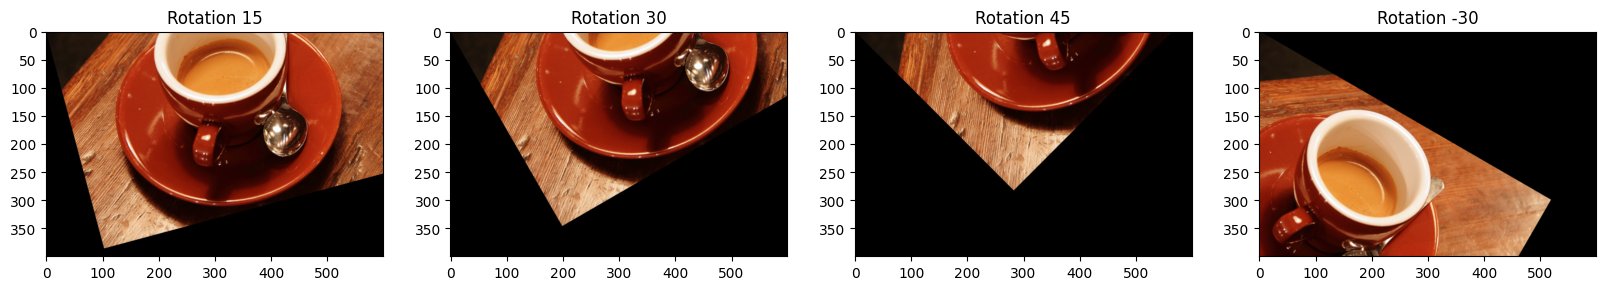

In [ ]:
import math

# generate img
def generateRotation(img, degree: int):
  # get matrix
  degree = np.radians(-degree)

  matrix = np.array([
      [math.cos(degree), -math.sin(degree), 0],
      [math.sin(degree), math.cos(degree), 0],
      [0, 0, 1]
  ])

  tmatrix = ProjectiveTransform(np.linalg.inv(matrix))

  return warp(img, tmatrix)


# The function rotates image 15 degree

img_15 = generateRotation(img, 15)

# The function rotates image 30 degree

img_30 = generateRotation(img, 30)

# The function rotates image 45 degree

img_45 = generateRotation(img, 45)

# The function rotates image -30 degree

img_n30 = generateRotation(img, -30)


fig, ax = plt.subplots(1, 4, figsize=(20,5))

ax[0].imshow(img_15)
ax[0].set_title("Rotation 15")


ax[1].imshow(img_30)
ax[1].set_title("Rotation 30")

ax[2].imshow(img_45)
ax[2].set_title("Rotation 45")

ax[3].imshow(img_n30)
ax[3].set_title("Rotation -30")






4.   Combining transformations:


*   Develop a single projective matrix that performs scaling by 1.5 times (both x and y), translation by 20 pixels (both x and y), and rotation by 45 degrees transformations. Explain how this matrix can be obtained.
*   Apply this combined transformation matrix to the original image and produce a modified image. Show the matrix and the modified image.





Text(0.5, 1.0, 'Combination')

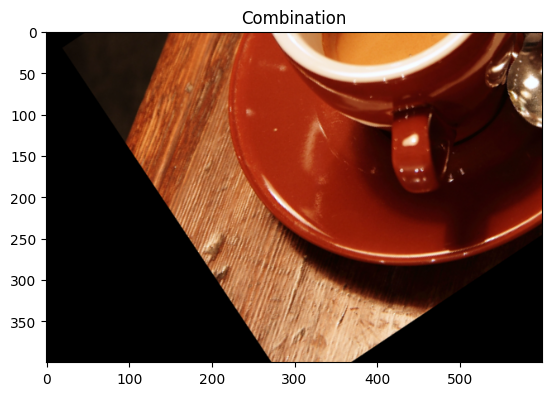

In [ ]:

sx, sy = 1.5, 1.5
t = 20
degree = 45

degree = np.radians(-degree)

# The matrix combine
m = np.array([
    [sx*math.cos(degree), -math.sin(degree), t],
    [math.sin(degree), sy*math.cos(degree), t],
    [0, 0, 1]
])

tmatrix = ProjectiveTransform(np.linalg.inv(m))

img_combo = warp(img, tmatrix)


plt.imshow(img_combo)
plt.title("Combination")




5.   Projective transformation:

*   Use the remaining values of the matrix which you have not used before (two leftmost in the bottom row) to apply a projective transformation to the original image. This transformation should introduce perspective changes, simulating how an object appears from a different viewpoint or under different camera conditions.
*   Create a modified version of the image after applying the projective transformation. Show the modified image and the projective matrix you used to produce it. Note, you might need to modify other values in the matrix so that it appears in the output image. Try different parameters until you find ones that work.




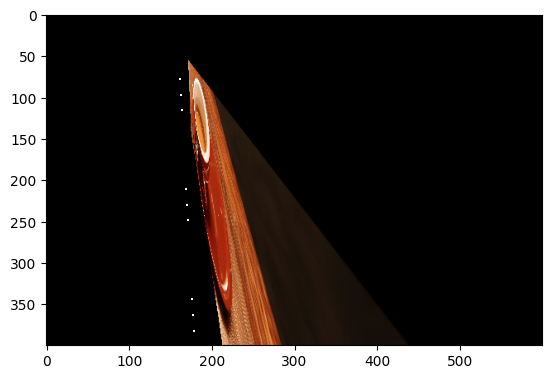

In [ ]:
# The matrix combine
m_proj = np.array([
    [0.8, 0.2, 50],
    [0.2, 0.8, 50],
    [0.005, 0.001, 0.09]
])

t_proj = ProjectiveTransform(np.linalg.inv(m_proj))

img_proj = warp(img, t_proj)


plt.imshow(img_proj)
# plt.title("Combination")